## 📥 Step 1: Data Loading  

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload
files.upload()

# Load
df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

# Preprocess: clean column names, convert date
df.rename(columns={'Countries': 'Country', 'Genre': 'Gender'}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month


Saving IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv to IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv


## 🧹 Step 2: Data Cleaning  


In [3]:
# Normalize risk labels
df['Critical Risk'] = df['Critical Risk'].replace({
    'Others': 'Other/Unknown',
    'Unknown': 'Other/Unknown',
    'remains of choco': 'Other/Unknown',
    'Vehicules and Mobile Equipment': 'Vehicles and Mobile Equipment'
})

# Group less frequent risks
risk_counts = df['Critical Risk'].value_counts()
top_risks = risk_counts[risk_counts >= 6].index
df['Critical Risk Cleaned'] = df['Critical Risk'].apply(lambda x: x if x in top_risks else 'Other/Unknown')


## 📊 Step 3: EDA   

In [4]:
print("Accident Level Counts:")
print(df['Accident Level'].value_counts())

print("\nPotential Accident Level Counts:")
print(df['Potential Accident Level'].value_counts())

print("\nTop 10 Critical Risks:")
print(df['Critical Risk'].value_counts().head(10))

print("\nAccidents by Country:")
print(df['Country'].value_counts())

print("\nTop 10 Cities:")
print(df['Local'].value_counts().head(10))

print("\nIndustry Sectors:")
print(df['Industry Sector'].value_counts())

print("\nGender:")
print(df['Gender'].value_counts())

print("\nEmployee vs Third Party:")
print(df['Employee or Third Party'].value_counts())


Accident Level Counts:
Accident Level
I      316
II      40
III     31
IV      30
V        8
Name: count, dtype: int64

Potential Accident Level Counts:
Potential Accident Level
IV     143
III    106
II      95
I       49
V       31
VI       1
Name: count, dtype: int64

Top 10 Critical Risks:
Critical Risk
Other/Unknown                    239
Pressed                           24
Manual Tools                      20
Chemical substances               17
Venomous Animals                  16
Cut                               14
Projection                        13
Bees                              10
Fall                               9
Vehicles and Mobile Equipment      8
Name: count, dtype: int64

Accidents by Country:
Country
Country_01    251
Country_02    130
Country_03     44
Name: count, dtype: int64

Top 10 Cities:
Local
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Name: count, 

## 📈 Step 4: Advanced Visuals  

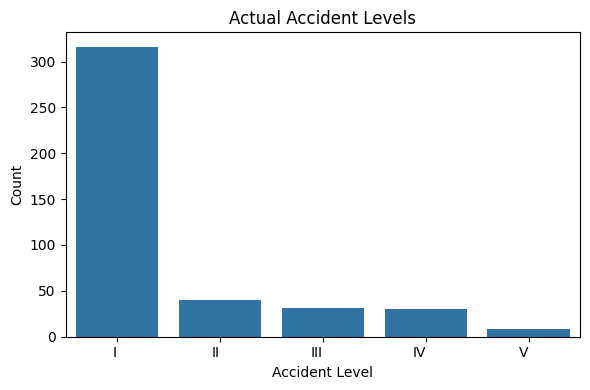

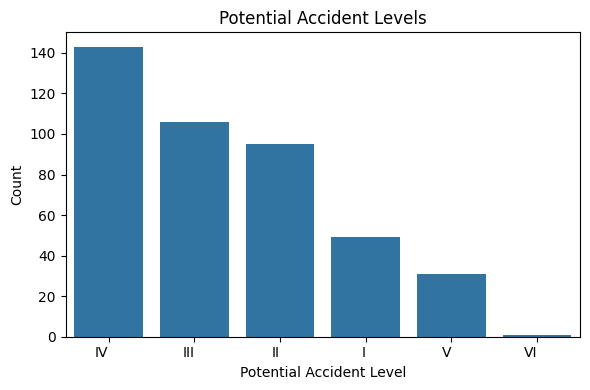

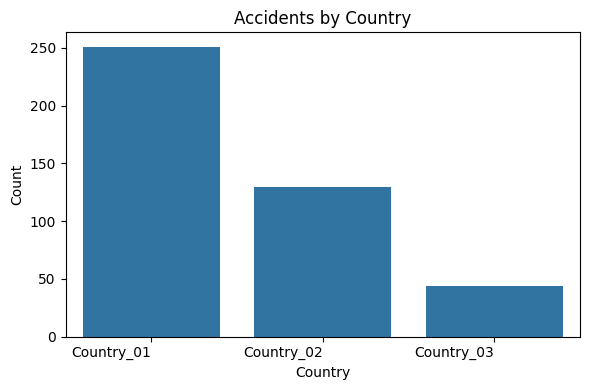

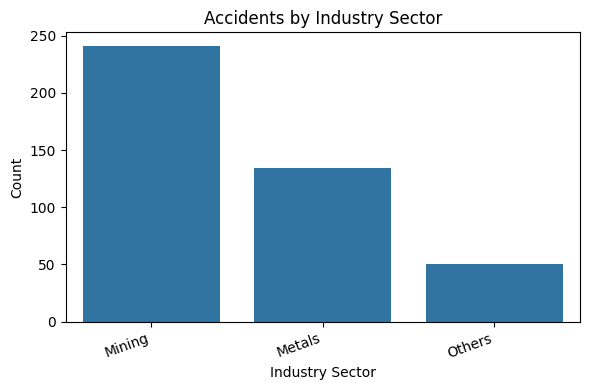

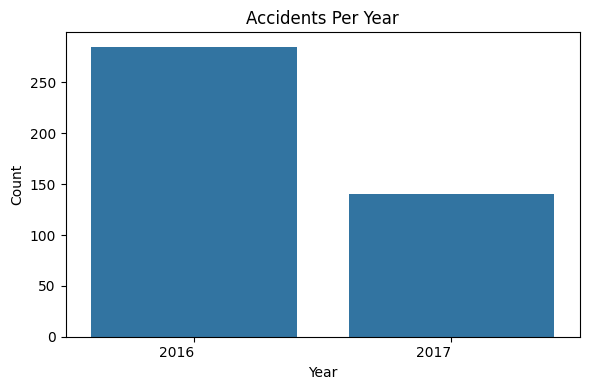

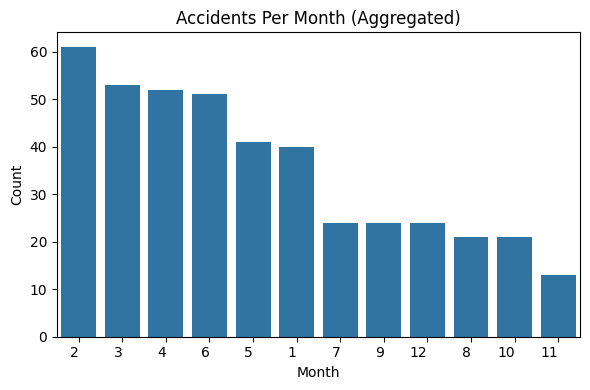

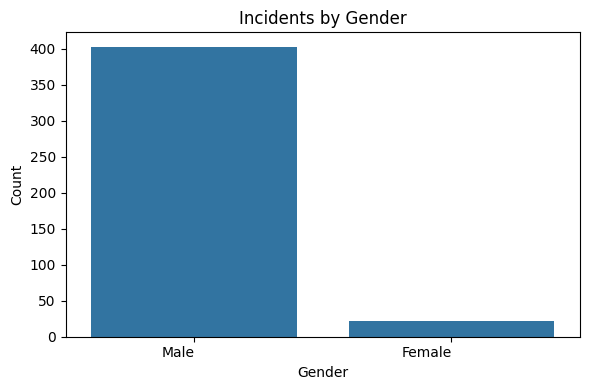

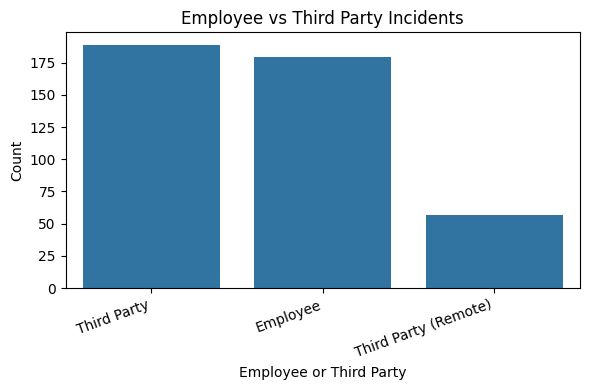

In [8]:
def plot_bar(column, title, rotation=0, order=None, figsize=(6,4)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column, order=order or df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=rotation, ha='right')
    plt.tight_layout()
    plt.show()

# Now call it:
plot_bar('Accident Level', 'Actual Accident Levels')
plot_bar('Potential Accident Level', 'Potential Accident Levels')
plot_bar('Country', 'Accidents by Country')
plot_bar('Industry Sector', 'Accidents by Industry Sector', rotation=20)
plot_bar('Year', 'Accidents Per Year')
plot_bar('Month', 'Accidents Per Month (Aggregated)')
plot_bar('Gender', 'Incidents by Gender')
plot_bar('Employee or Third Party', 'Employee vs Third Party Incidents', rotation=20)


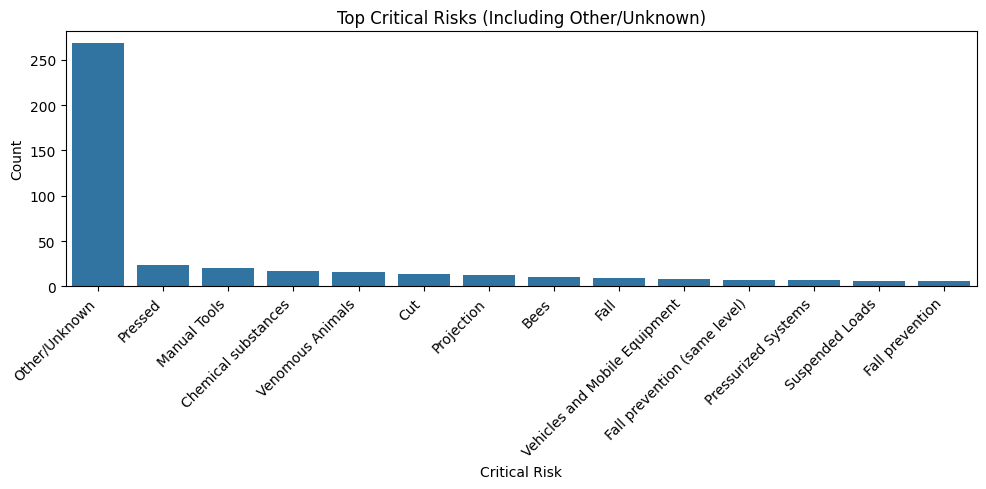

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Critical Risk Cleaned',
              order=df['Critical Risk Cleaned'].value_counts().index)
plt.title("Top Critical Risks (Including Other/Unknown)")
plt.xlabel("Critical Risk")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Why include "Other/Unknown"?

This category includes unclassified, messy, or low-frequency risk types. Keeping it in the visualization highlights:

- The proportion of incidents that lack clear labeling.
- A potential data quality issue in risk documentation.
- The importance of improving classification in future reporting.

However, since "Other/Unknown" doesn’t provide actionable insight, we also show a cleaned version excluding it.


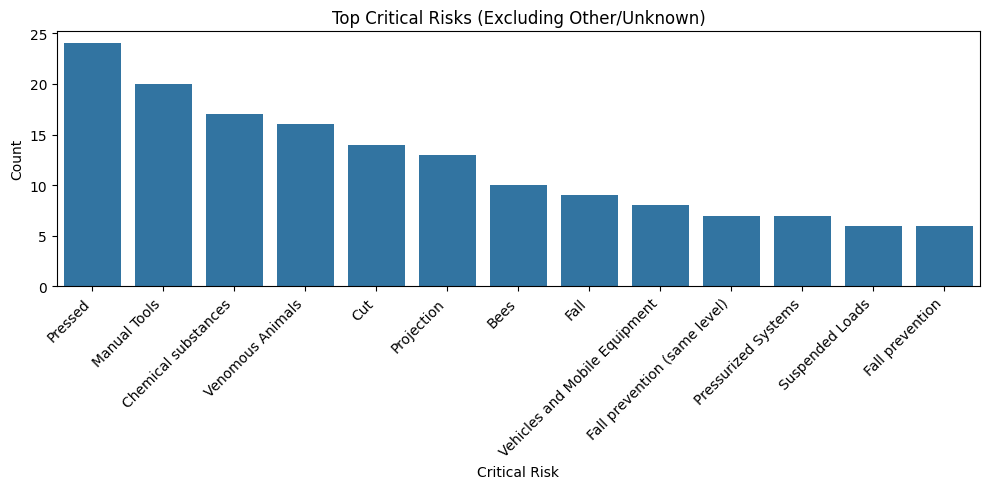

In [6]:
filtered_df = df[df['Critical Risk Cleaned'] != 'Other/Unknown']

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x='Critical Risk Cleaned',
              order=filtered_df['Critical Risk Cleaned'].value_counts().index)
plt.title("Top Critical Risks (Excluding Other/Unknown)")
plt.xlabel("Critical Risk")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Part 2 Advanced Analysis

a. Cross-Tab Analysis

In [9]:
# Cross-tab of Accident Level by Industry Sector
pd.crosstab(df['Industry Sector'], df['Accident Level'], normalize='index').round(2)


Accident Level,I,II,III,IV,V
Industry Sector,,,,,
Metals,0.80,0.09,0.05,0.05,0.01
Mining,0.69,0.11,0.08,0.09,0.03
Others,0.84,0.04,0.08,0.04,0.00


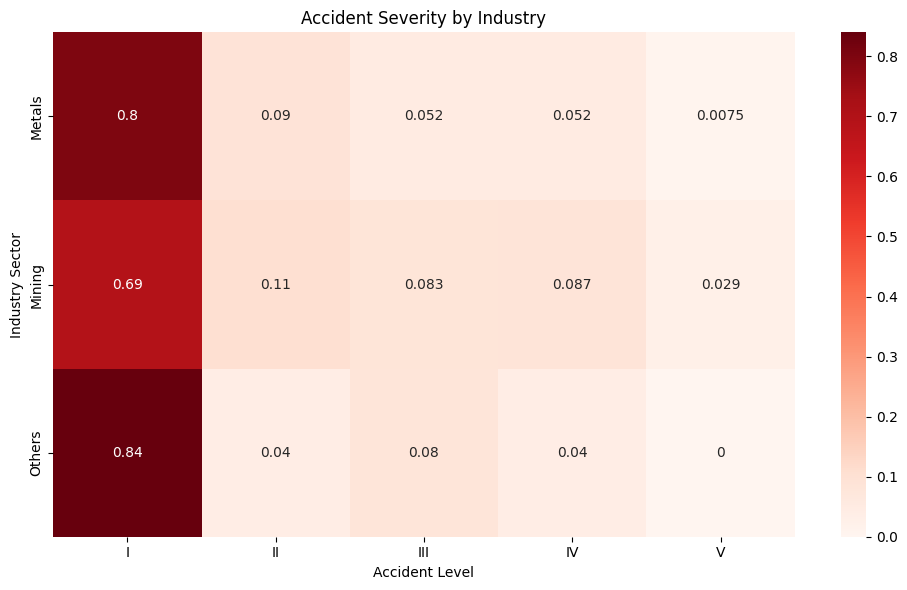

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Industry Sector'], df['Accident Level'], normalize='index'), annot=True, cmap='Reds')
plt.title("Accident Severity by Industry")
plt.xlabel("Accident Level")
plt.ylabel("Industry Sector")
plt.tight_layout()
plt.show()


# Time-Series Trends

a. Monthly trends over multiple years

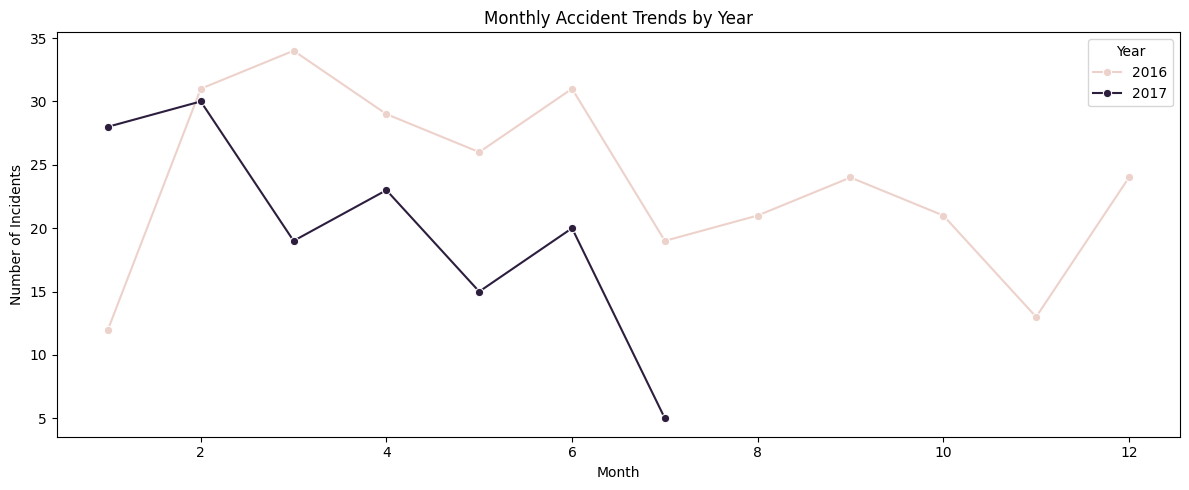

In [11]:
monthly_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Incidents')

# Line plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_trends, x='Month', y='Incidents', hue='Year', marker='o')
plt.title("Monthly Accident Trends by Year")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()


## 🔍 Step 5: NLP on Descriptions  

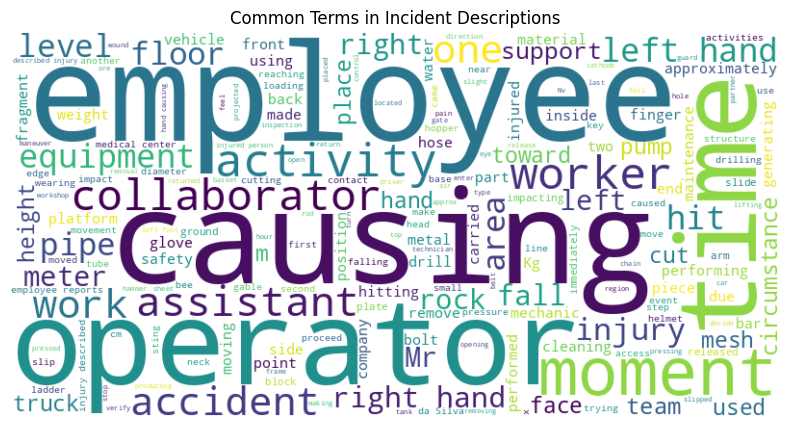

In [12]:
from wordcloud import WordCloud

text = " ".join(df['Description'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Incident Descriptions")
plt.show()


## 🤖 Step 6: Predictive Modeling

In [14]:
high_severity = ['IV', 'V', 'VI']
df['High Severity'] = df['Potential Accident Level'].isin(high_severity).astype(int)


In [15]:
y = df['High Severity']

# Match features to rows that have both target + predictors
df_model = df[['High Severity', 'Accident Level', 'Industry Sector', 'Gender']].dropna()
df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop('High Severity', axis=1)
y = df_model['High Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.93      0.81        75
           1       0.84      0.49      0.62        53

    accuracy                           0.75       128
   macro avg       0.78      0.71      0.72       128
weighted avg       0.77      0.75      0.73       128



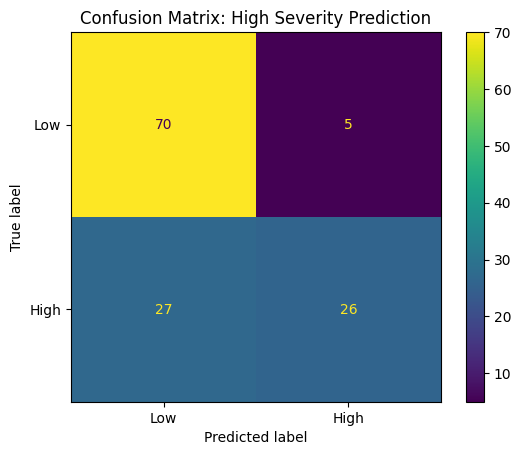

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Low", "High"])
plt.title("Confusion Matrix: High Severity Prediction")
plt.show()


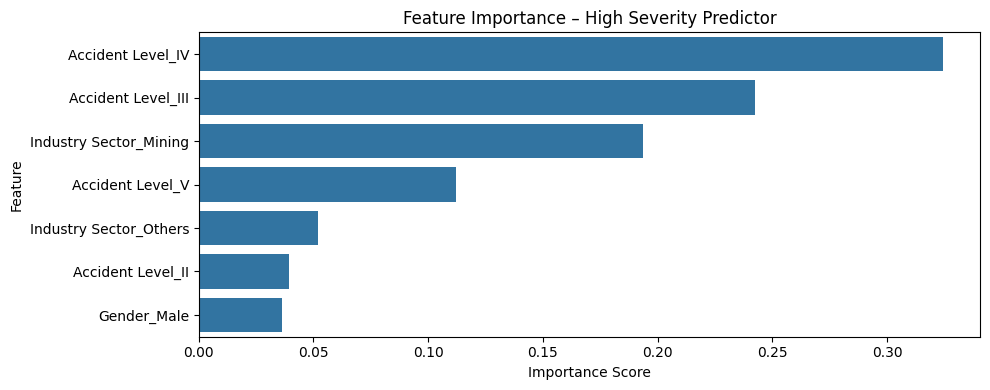

In [18]:
import numpy as np

# Plot feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 4))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance – High Severity Predictor")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 🔮 Predicting High Severity Incidents (IV/V/VI)

To identify high-risk accidents, we trained a Random Forest classifier to predict whether an incident would fall into a high-potential severity category. We used industry sector, accident level, and gender as predictors.

**Key Takeaways:**
- Model performance was evaluated using precision, recall, and F1-score.
- A confusion matrix shows how well the model distinguishes high-severity from low-severity cases.
- Feature importance revealed which variables contributed most to the prediction.

This approach can support proactive safety strategies by flagging risk factors associated with severe accidents.


## 📌 Conclusion

This analysis identified the most common and most severe risks in industrial environments.
By cleaning, visualizing, and modeling the data, we discovered:

- “Pressed” and “Manual Tools” are leading causes of incidents.
- Severity is often underreported in early incident levels.
- Mining is the most at-risk industry.
- There are seasonal trends in monthly accident patterns.
- A simple machine learning model can identify key features tied to high severity.

### 📢 Recommendations
- Improve labeling quality to reduce “Other/Unknown” risks.
- Target high-risk sectors with customized training.
- Use model predictions to flag high-risk profiles for preventative intervention.
